# Solar Cell

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets


try:
    import photovoltaic as pv
except:
    print('attempting to install photovoltaic')
    %pip install photovoltaic
    import photovoltaic as pv

## Voltage and Minority Carrier Density in a Silicon Solar Cell


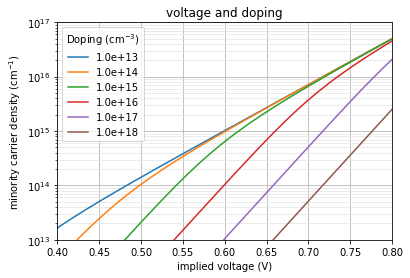

In [209]:
plt.figure()
plt.semilogy()
plt.xlim(0.4, 0.8)
plt.ylim(1e13, 1e17)
plt.ylabel('minority carrier density (cm$^{-1}$)')
plt.xlabel('implied voltage (V)')
plt.title('voltage and doping')
plt.grid(b=True, which='major', color='0.7', linestyle='-')
plt.grid(b=True, which='minor', color='0.9', linestyle='-')

Δn = np.logspace(13, 20) # sweep the minority carrier density. Using greek letters for variable names is not a good idea.
dopings = (1e13, 1e14, 1e15, 1e16, 1e17, 1e18)
for doping in dopings:
    impliedV = pv.cell.impliedV(Δn, doping)
    plt.plot(impliedV, Δn, label='{:.1e}'.format(doping))

plt.legend(loc='upper left', title='Doping (cm$^{-3}$)')
plt.savefig('plot_doping_impliedV.png')
plt.show()

## Collection and Internal Quantum Efficiency
Front Junction cell. The assumption is that there is no light trapping.

In [210]:
#setup the basic solar cell
cell_thickness = 180e-4 #(cm)
We =  1e-4 # (cm)
De = 4
Se = 1000 # cm/s
Le = 0.5e-4 #cm
Wb = cell_thickness - We # (cm)
Db = 4  #cm2/Vs
Wd = 0
Sb = 1 # (cm/s)
Lb = 200e-4 # (cm)


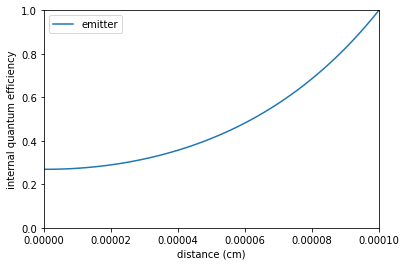

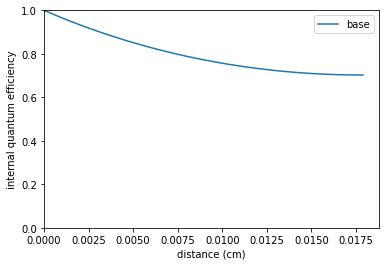

In [211]:

x_emitter = np.linspace(0, We)
x_base = np.linspace(0,Wb)
collection_emitter = pv.cell.collection(x_emitter, We, Se, Le, De)
collection_base = pv.cell.collection(x_base, Wb, Sb, Lb, Db)
plt.plot(We-x_emitter, collection_emitter, label ='emitter')
plt.ylim(0, 1)
plt.xlim(0, We)
plt.ylabel('internal quantum efficiency')
plt.xlabel('distance (cm)')
plt.legend()
plt.show()

plt.plot(x_base, collection_base, label ='base')
plt.xlim(0)
plt.ylim(0, 1)
#plt.xlim(300, 1200)
plt.ylabel('internal quantum efficiency')
plt.xlabel('distance (cm)')
plt.legend()
plt.show()

Using the same properties above we can calculate the Internal quatum efficiency

In [212]:
# add the optical properties
wavelength, abs_coeff, nd, kd = pv.si.optical_properties()
QEE, QEB, QED, QET = pv.cell.iqe(abs_coeff, Wd, Se, Le, De, We, Sb, Wb, Lb, Db)

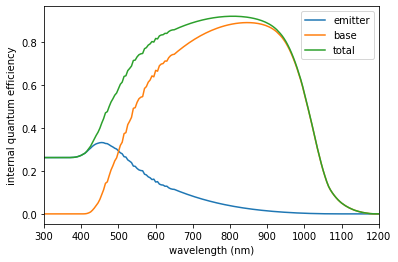

In [213]:
plt.plot(wavelength, QEE, label ='emitter')
plt.plot(wavelength, QEB, label ='base')
plt.plot(wavelength, QET, label ='total')
plt.xlim(300, 1200)
plt.ylabel('internal quantum efficiency')
plt.xlabel('wavelength (nm)')
plt.legend()
plt.show()

## Rear Junction
A rear junction cell is similar to the front junction case. The terminology of base and emitter is confusing. 

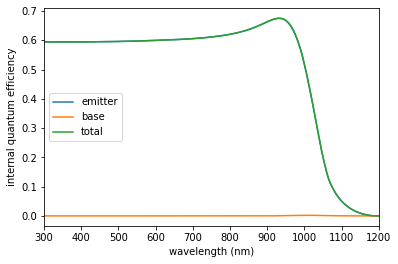

In [214]:
wavelength, abs_coeff, nd, kd = pv.si.optical_properties()
cell_thickness = 180e-4 #(cm)
Wb = 1e-4 # (cm)

We =  cell_thickness - Wb # (cm)
De = 27
Se = 1000 # cm/s
Le = 1000e-4 #cm


Db = 27  #cm2/Vs
Wd = 0
Sb = 1000 # (cm/s)
Lb = 100e-4 # (cm)

QEEr, QEBr, QEDr, QETr = pv.cell.iqe(abs_coeff, Wd, Se, Le, De, We, Sb, Wb, Lb, Db)

plt.plot(wavelength, QEEr, label ='emitter')
plt.plot(wavelength, QEBr, label ='base')
plt.plot(wavelength, QETr, label ='total')
plt.xlim(300, 1200)
plt.ylabel('internal quantum efficiency')
plt.xlabel('wavelength (nm)')
plt.legend()
plt.show()


## Short Circuit Current Density, J<sub>SC</sub>

No handles with labels found to put in legend.


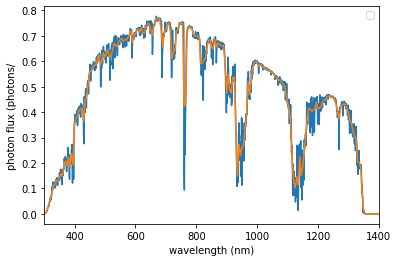

In [215]:
#get the standard spectra
wavelength_spectra, AM0, AM15G, AM15D = pv.sun.solar_spectra()
#photon flux
photon_energy = 1239.8/wavelength_spectra
AM15G_photons = AM15G/photon_energy
plt.plot(wavelength_spectra, AM15G_photons)
wavelength_spectra, AM15G_photons = pv.sun.equal_spacing(wavelength_spectra, AM15G_photons, 250, 1450, 5)
plt.plot(wavelength, AM15G_photons/5)
plt.xlim(300, 1400)
plt.ylabel('photon flux (photons/')
plt.xlabel('wavelength (nm)')
plt.legend()
plt.show()

#calculate the number of photons in each interval


No handles with labels found to put in legend.


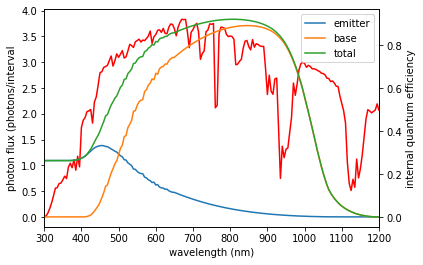

304.8738620858794

In [216]:
#setup the basic solar cell
cell_thickness = 180e-4 #(cm)
We =  1e-4 # (cm)
De = 4
Se = 1000 # cm/s
Le = 0.5e-4 #cm
Wb = cell_thickness - We # (cm)
Db = 4  #cm2/Vs
Wd = 0
Sb = 1 # (cm/s)
Lb = 200e-4 # (cm)

wavelength, abs_coeff, nd, kd = pv.si.optical_properties()
QEE, QEB, QED, QET = pv.cell.iqe(abs_coeff, Wd, Se, Le, De, We, Sb, Wb, Lb, Db)

plt.plot(wavelength, AM15G_photons,c='r')
plt.xlim(300, 1400)
plt.ylabel('photon flux (photons/interval')
plt.xlabel('wavelength (nm)')
plt.legend()
plt.twinx()
plt.plot(wavelength, QEE, label ='emitter')
plt.plot(wavelength, QEB, label ='base')
plt.plot(wavelength, QET, label ='total')
plt.xlim(300, 1200)
plt.ylabel('internal quantum efficiency')
plt.xlabel('wavelength (nm)')
plt.legend()
plt.show()

Jsc = np.sum(QET*AM15G_photons)
Jsc

In [217]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, readout_format='.1f')